# Overview
- Purnima Surve and Kiran karandikar has worked together on this assignement

In [86]:
#  library imports
import argparse
from timeit import Timer

from matplotlib import pyplot as plt
from random import sample, seed


In [110]:
rec_fun = lambda x: float(1 / float(x))
def f(*x, **y):
	def s1(x):
		s = 0
		if x:
			for i in x:
				s += i
		return s

	def p1(x):
		s = 1
		if x:
			for i in x:
				s *= i
		return s

	if y ["action"] == "sum":
		return s1(*x)
	elif y ["action"] == "prod":
		return p1(*x)
	elif y ["action"] in ("reciprocal sum", "rec"):
		return s1(map(rec_fun, *x))
	else:
		return "bad argument:{}".format(y)
    
print("Problem 1: Sum of reciprocals")
xlst = [1, 2, 3, 4, 5]
print(f(xlst, action="sum"))
print(f(xlst, action="prod"))
print(f(xlst, action="reciprocal sum"))

Problem 1: Sum of reciprocals
15
120
2.283333333333333


In [104]:
import sys
sys.argv=['']
print("Problem 2")
parser = argparse.ArgumentParser()
parser.add_argument("-lst", nargs="+", default=["1", "2", "3", "4", "5"], help="List of  the numbers")
parser.add_argument("-op", default="rec", help="sum, prod, rec")
# sys.argv = ['-lst'] + ["5","6","7","8","9"] 
args = parser.parse_args(args=["-lst", "5","6","7","8","9", "-op", "prod"])
print("List of number is : {}".format(args.lst))
print("Operation to be performed : {}".format(args.op))
print(f(map(lambda x: int(x), args.lst), action=args.op))

Problem 2
List of number is : ['5', '6', '7', '8', '9']
Operation to be performed : prod
15120


### Execution of problem 2 on command line
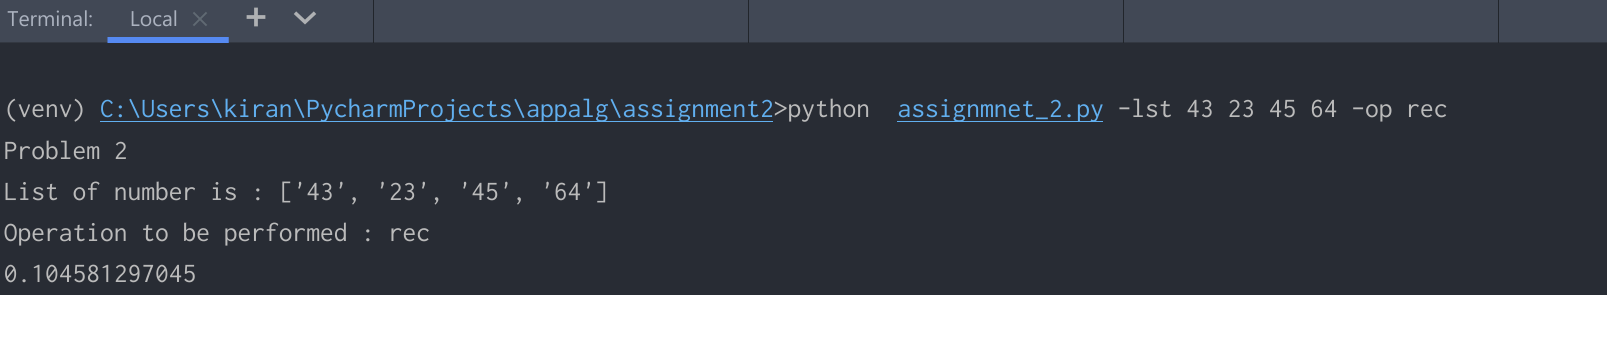

In [106]:
class complex_:
	def __init__(self, re = 0, im = 0):
		self.re = re
		self.im = im

	def get_re(self):
		return self.re

	def get_im(self):
		return self.im

	def __str__(self):
		g = lambda x: "+" if int(x) >= 0 else ""
		return "{}{}{}i".format(self.re, g(self.im), self.im)

	def cadd(self, other):
		return complex_(
			self.get_re() + other.get_re(),
			self.get_im() + other.get_im()
		)

	def __add__(self, other):
		return complex_(
			self.get_re() + other.get_re(),
			self.get_im() + other.get_im()
		)

	def __mul__(self, other):
		first_mul = complex_(self.re * other.re, self.re * other.im)
		sec_mul = complex_(-1 * self.im * other.im, self.im * other.re)
		return first_mul + sec_mul
    
print("Problem 3: Complex Numbers")
w = complex_(1, -3)
x = complex_(-1, 3)
y = complex_(1, 3)
z = complex_(-1, -3)
print(w)
print(x)
print(y)
print(z)
print(w.cadd(x).cadd(y).cadd(z))
print((1 - 3j) + (-1 + 3j) + (1 + 3j) + (-1 - 3j))
print(w + x + y + z)
print("Complex Number multiplication")
print(w * x * y * z)
print((1 - 3j) * (-1 + 3j) * (1 + 3j) * (-1 - 3j))   

Problem 3: Complex Numbers
1-3i
-1+3i
1+3i
-1-3i
0+0i
0j
0+0i
Complex Number multiplication
100+0i
(100+0j)


Problem 4: Running time


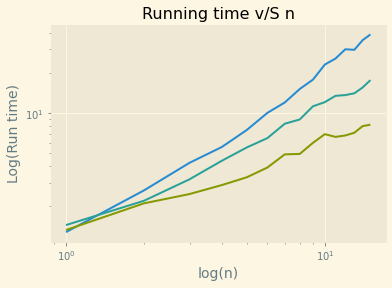

In [107]:
def average1(S):
	# S:sequence
	n = len(S)
	my_average = [0] * n
	for j in range(n):
		total = 0
		for i in range(j + 1):
			total += S [i]
		my_average [j] = total / (j + 1)
	return my_average


def average2(S):
	# S:sequence
	n = len(S)
	my_average = [0] * n
	for j in range(n):
		my_average [j] = sum(S [0:j + 1]) / (j + 1)
	return my_average


def average3(S):
	# S:sequence
	n = len(S)
	my_average = [0] * n
	total = 0
	for j in range(n):
		total += S [j]
		my_average [j] = total / (j + 1)
	return my_average


print("Problem 4: Running time")
data_points_avg1 = []
data_points_avg2 = []
data_points_avg3 = []
data_size = []
for i in range(15):
    seed(50)
    s = sample(range(0, 200), i)
    t = Timer(lambda: average1(s))
    run_time = t.timeit()
    data_points_avg1.append(run_time)
    t = Timer(lambda: average2(s))
    run_time = t.timeit()
    data_points_avg2.append(run_time)
    t = Timer(lambda: average3(s))
    run_time = t.timeit()
    data_points_avg3.append(run_time)
    data_size.append(i + 1)
with plt.style.context('Solarize_Light2'):
    plt.loglog(data_size, data_points_avg1)
    plt.loglog(data_size, data_points_avg2)
    plt.loglog(data_size, data_points_avg3)
    plt.title('Running time v/S n')
    plt.xlabel('log(n)', fontsize=14)
    plt.ylabel('Log(Run time)', fontsize=14)
plt.show()

In [108]:
def algorithm1(S):
	# S: Sequence
	for j in range(len(S)):
		for k in range(j + 1, len(S)):
			if S [j] == S [k]:
				return False
	return True


def algorithm2(S):
	# S:sequence
	S = sorted(S)
	for j in range(1, len(S)):
		if S [j - 1] == S [j]:
			return False
	return True


def algorithm3(S, start, stop):
	# slice S[start:stop], S:sequence
	if stop - start <= 1:
		return True
	elif not algorithm3(S, start, stop - 1):
		return False
	elif not algorithm3(S, start + 1, stop):
		return False
	else:
		return S [start] != S [stop - 1]
    
    
run_time_alg1 = 0
run_time_alg2 = 0
run_time_alg3 = 0
print("Problem 5: Time analysis")
for i in range(150):
    seed(50)
    s = sample(range(0, 200), i)
    t = Timer(lambda: algorithm1(s))
    if int(run_time_alg1) < 45:
        run_time_alg1 = t.timeit()
    else:
        print("Max Input size for algorithm 1 is :{}".format(i))
        break
for i in range(150):
    seed(50)
    s = sample(range(0, 200), i)
    t = Timer(lambda: algorithm2(s))
    if int(run_time_alg2) < 45:
        run_time_alg2 = t.timeit()
    else:
        print("Max Input size for algorithm 2 is :{}".format(i))
        break
for i in range(150):
    seed(50)
    s = sample(range(0, 200), i)
    t = Timer(lambda: algorithm3(s, 0, i))
    if int(run_time_alg3) < 45:
        run_time_alg3 = t.timeit()
    else:
        print("Max Input size for algorithm 3 is :{}".format(i))
        break

Problem 5: Time analysis
Max Input size for algorithm 1 is :18
Max Input size for algorithm 2 is :107
Max Input size for algorithm 3 is :8
